
## World Fertility Data
### World Fertility Data 2019
 
World Fertility Data 2019 presents age-specific fertility rates, total fertility, and mean age at childbearing for 201 countries or areas of the world. It includes empirical data from civil registration systems, population censuses, and sample surveys available as of August 2019 and covers the time period from 1950 to the present.

The dataset builds on the historical repository of demographic data and census and survey reports collected over the past 50 years by the Population Division and Statistics Division of the United Nations Department of Economic and Social Affairs. Estimates based on data compiled from civil registration systems are generally obtained from National Statistical Offices. Additional sources of data include the Demographic and Health Surveys (DHS), the Multiple Indicator Cluster Surveys (MICS), the Reproductive Health Surveys (RHS), the Statistical Office of the European Union (Eurostat), the Human Fertility Database (HFD), the Human Fertility Collection (HFC), the Pan-Arab Project for Child Development Surveys (PAPCHILD), the Pan-Arab Project for Family Health Survey (PAPFAM), national surveys, as well as fertility estimates produced by the Population Division of DESA.
 
Note. The empirical data used for deriving estimates in World Population Prospects 2019 are not necessarily the same as reported in World Fertility Data 2019 due to the time lag between the two publications. Moreover, fertility estimates in World Population Prospects 2019 may incorporate additional adjustments to account for cohort sizes in consecutive censuses.

## Visualizing Fertility Data


This notebook creates interesting visualizations of the fertility data, hopefully adding some insight into the future of humanity.


#### Install packages for this notebook
Remove the `--quiet` to see the installation process.


In [30]:
import warnings
warnings.filterwarnings('ignore')

! python -m pip install --upgrade pip --quiet
! pip install --upgrade setuptools --quiet
! pip install geopandas pandas ipyleaflet matplotlib mapclassify shapely branca --quiet
# Import necessary libraries

#### Imports

In [31]:
import warnings
import pandas as pd
import geopandas as gpd
import datetime
from dataclasses import dataclass
from typing import Dict, List, Optional, Tuple, Any
from ipywidgets import widgets, HTML, VBox, Layout
from ipyleaflet import Map, GeoJSON, Popup, WidgetControl
import branca.colormap as cm
from shapely.geometry import shape
import shapely
from IPython.display import Image


## Recap of Data, Goals, and Tasks

The primary objective of this project is to visualize global fertility trends using the World Fertility Data 2019. The dataset includes age-specific fertility rates, total fertility rates, and mean age at childbearing for over 200 countries. The aim is to present this data through engaging, interactive visualizations that allow users to explore how fertility patterns have evolved across different regions and age groups.

### Key Tasks:
- Create interactive maps to visualize fertility rates globally.
- Provide insights into global demographic trends and project potential future changes.

### Key Definitions:
#### Fertility Metrics: TFR, MAC, and ASFR

This section explains key fertility metrics, including Total Fertility Rate (TFR), Mean Age at Childbearing (MAC), and Age-Specific Fertility Rate (ASFR), along with their corresponding calculations.

#### 1. Age-Specific Fertility Rate (ASFR)
The **Age-Specific Fertility Rate (ASFR)** represents the number of live births per 1,000 women in a specific age group during a defined period, typically one year.

#### Formula:
$$
ASFR = \left( \frac{\text{Number of live births to women in a specific age group}}{\text{Number of women in that age group}} \right) \times 1000
$$

#### Example:
If there are 50 live births to women aged 20-24 in a year, and the population of women in that age group is 10,000, the ASFR would be:

$$
ASFR = \left( \frac{50}{10,000} \right) \times 1000 = 5 \, \text{live births per 1,000 women in that age group}
$$

#### 2. Total Fertility Rate (TFR)
The **Total Fertility Rate (TFR)** estimates the average number of children a woman would have if she experienced the current Age-Specific Fertility Rates (ASFRs) throughout her reproductive years (usually ages 15-49).

#### Formula:
$$
TFR = \sum_{i=1}^{n} \left( ASFR_i \times \frac{5}{1000} \right)
$$
Where:
- \( ASFR_i \) is the Age-Specific Fertility Rate for the \( i \)-th age group.
- \( n \) is the number of age groups.

#### Example:
If the ASFR for the age groups 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, and 45-49 are provided, the TFR is calculated as the sum of the ASFRs for each group, adjusted for the 5-year intervals.

#### 3. Mean Age at Childbearing (MAC)
The **Mean Age at Childbearing (MAC)** represents the average age at which women give birth. It is calculated by weighting the ages of women in each age group by their ASFRs and dividing by the total number of live births.

#### Formula:
$$
MAC = \frac{\sum_{i=1}^{n} (a_i \times ASFR_i)}{\sum_{i=1}^{n} ASFR_i}
$$
Where:
- \( a_i \) is the mid-point of each age group (e.g., 17.5 for 15-19, 22.5 for 20-24, etc.).
- \( ASFR_i \) is the Age-Specific Fertility Rate for the \( i \)-th age group.

#### Example:
If the ASFR for different age groups is known, the MAC can be calculated by summing the product of each age group's mid-point and its ASFR, and dividing by the total ASFR.




## Screenshots of the Visualization

### Images of the visualization 
These are screen shot of the visualization from the datasets available. 
 - TFR
 - MAC
 - ASFR

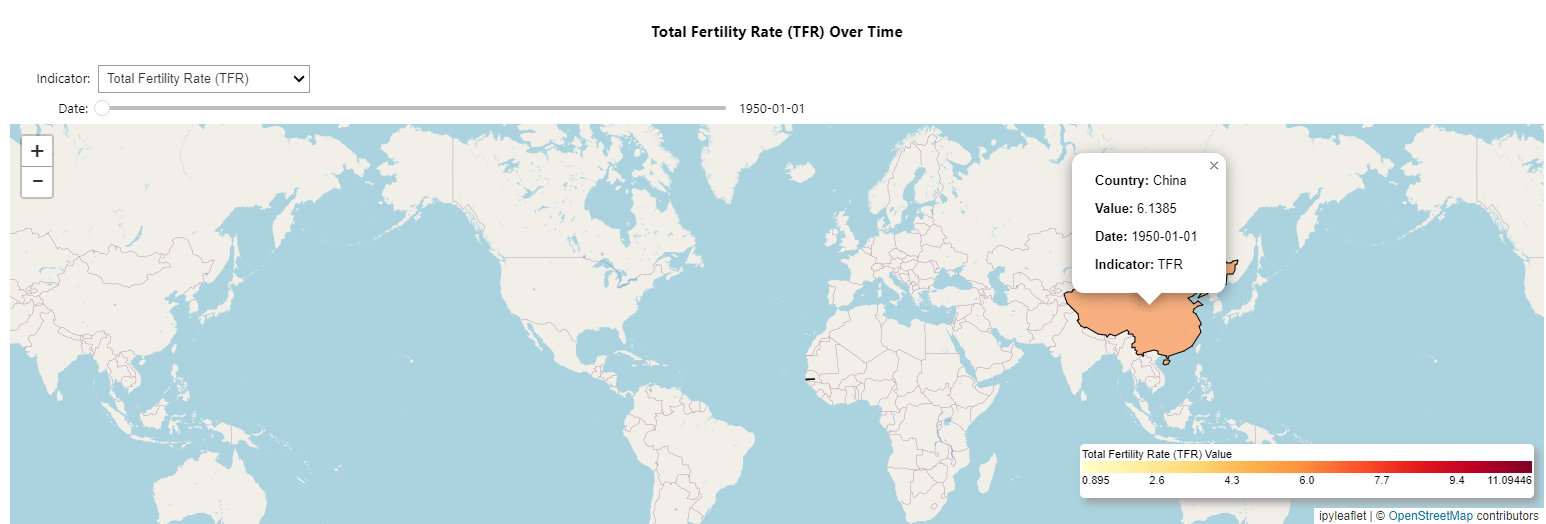

In [32]:
# Display Images of the data
Image(filename='data/Images/TFR_1950_01_01.png', width=800, height=800)

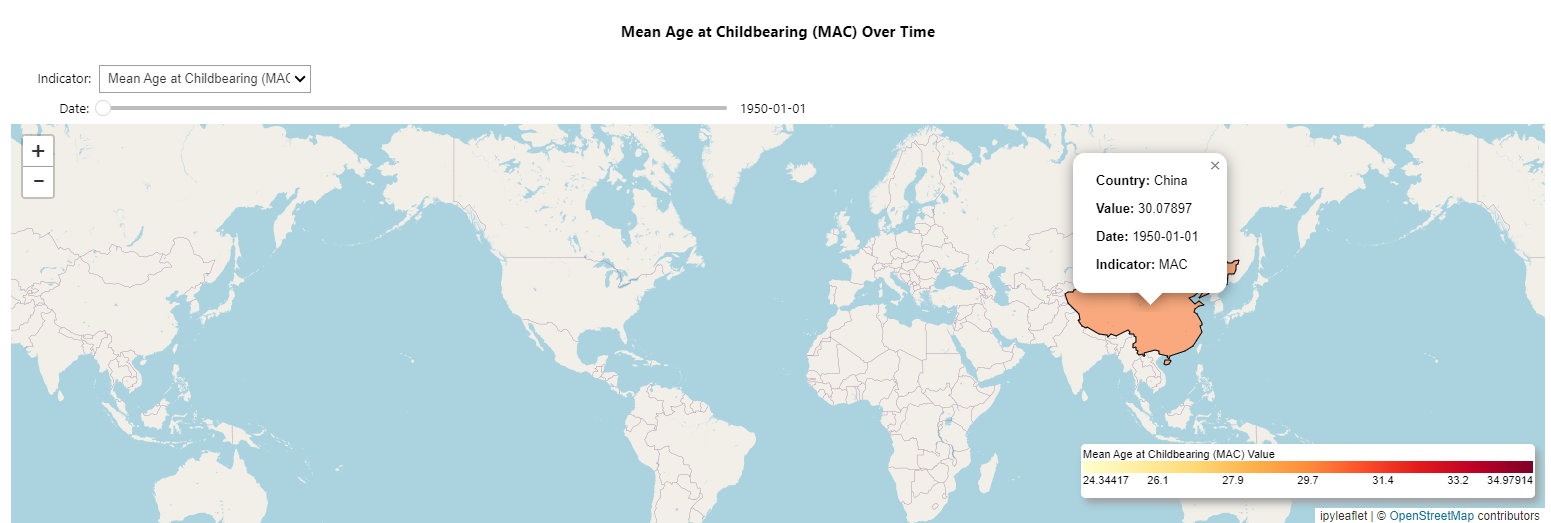

In [33]:
Image(filename='data/Images/MAC_1950_01_01.png', width=800, height=800)

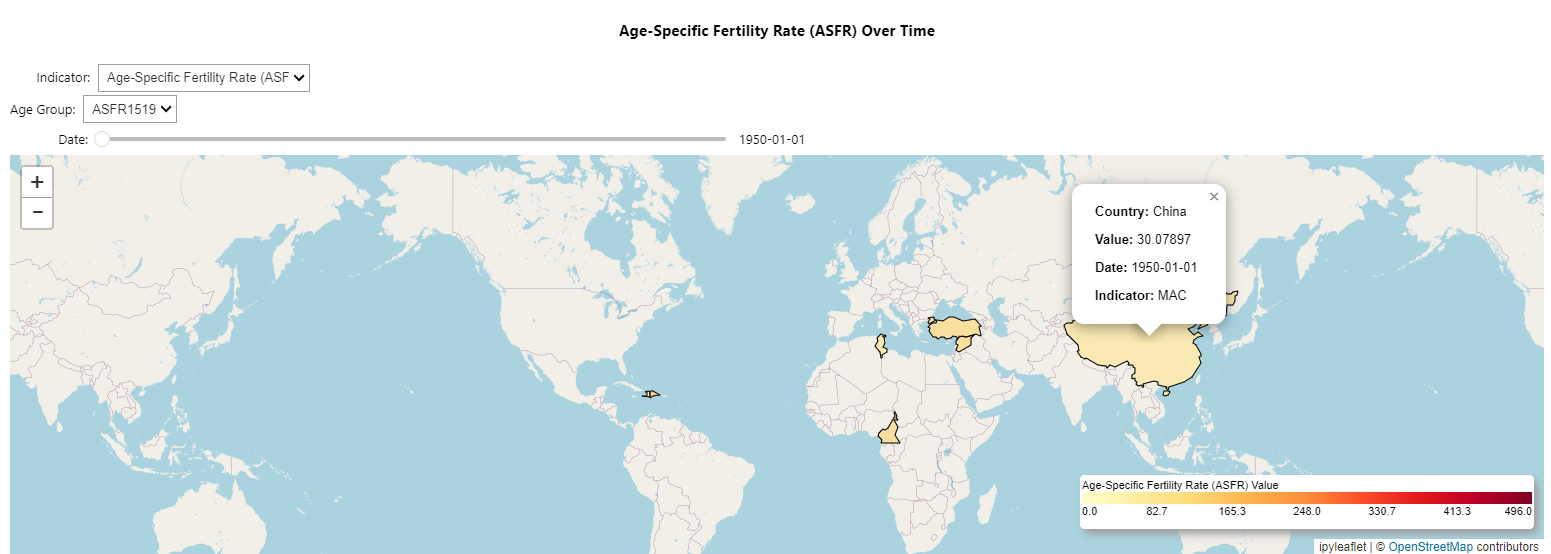

In [34]:
Image(filename='data/Images/ASFR_1950_01_01.png', width=800, height=800)


## Design Elements and Justification
The main design choice for this project was to use an interactive world map to display fertility data across different countries and time periods. This allows users to engage directly with the data, exploring trends over time and across regions. The map uses a color scale to represent fertility rates, making it easy to compare countries at a glance. 

**Design Justification:**
- **Interactivity**: Enables exploration of specific regions and time periods.
- **Color coding**: Facilitates quick comparison of fertility rates across countries.
- **Temporal slider**: Provides a clear view of how fertility trends evolve over time.



### Read the United Nations data for fertility.

Three tabs are in the data:
- INFORMATION NOTE
  - Loaded as `df_information_note`
- Database Field Descriptions
  - Loaded as `df_feild_description`
- FERTILITY INDICATORS
  - `df_fertility_indicators`



Data location for reproducibility:
 
The data can be accessed at the following location: [World Fertility Data 2019](https://www.un.org/development/desa/pd/data/world-fertility-data)
 
Citation: United Nations, Department of Economic and Social Affairs, Population Division (2019). *World Fertility Data 2019*. POP/DB/Fert/Rev2019.




Load the data

Load the data for the fertility indicators


### World Map
 
This section loads the world map data from [Natural Earth Data](https://www.naturalearthdata.com/downloads/110m-physical-vectors/).

Note: [Download](https://www.naturalearthdata.com/downloads/110m-physical-vectors/#:~:text=Download%20all%20110m%20physical%20themes%20(3.27%20MB)%20version%205.1.0) all 110m physical themes (3.27 MB) version 5.1.0


## Data Loading and Processing Classes

## DataPaths Class
The `DataPaths` class is a data class that stores the file paths for our key data sources. It uses Python's `@dataclass` decorator which automatically generates special methods like `__init__` and `__repr__`.

### Attributes:
- `FERTILITY_DATA`: Path to the UN World Fertility Dataset Excel file
- `WORLD_MAP`: Path to the Natural Earth geographical data shapefile

## DataLoader Class
The `DataLoader` class handles all data loading and preprocessing operations. It's designed with static methods to provide utility functions without requiring class instantiation.

### Methods:

#### `load_fertility_data`
```python
@staticmethod
def load_fertility_data(path: str) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]

In [36]:
@dataclass
class DataPaths:
    """Data paths configuration"""
    FERTILITY_DATA: str = 'data/datasets/undesa_pd_2019_world_fertility_dataset.xlsx'
    WORLD_MAP: str = './Data/Map_data/ne_110m_admin_0_countries.shp'

class DataLoader:
    """Handles all data loading and preprocessing operations"""
    
    @staticmethod
    def load_fertility_data(path: str) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
        """Load fertility data from Excel file"""
        try:
            info_note = pd.read_excel(path, sheet_name='INFORMATION NOTE', skiprows=6)
            field_desc = pd.read_excel(path, sheet_name='Database Field Descriptions')
            indicators = pd.read_excel(path, sheet_name='FERTILITY INDICATORS', skiprows=6)
            
            # Rename columns for consistency
            indicators.rename(columns={
                'Country or Area': 'country',
                'Country or Area Code': 'country_code'
            }, inplace=True)
            
            return info_note, field_desc, indicators
        except Exception as e:
            raise Exception(f"Error loading fertility data: {e}")
    
    @staticmethod
    def convert_fractional_year(year: float) -> Optional[datetime.date]:
        """Convert fractional year to date"""
        if pd.isnull(year):
            return None
            
        year_int = int(year)
        fraction = year - year_int
        days_in_year = 366 if (year_int % 4 == 0 and (year_int % 100 != 0 or year_int % 400 == 0)) else 365
        days_to_add = int(fraction * days_in_year)
        
        return datetime.date(year_int, 1, 1) + datetime.timedelta(days=days_to_add)

### Data Processing
The ```FertilityDataProcessor``` class streamlines data preparation for visualization. It performs the following key tasks:

- Date Conversion: Transforms raw date information into a standardized format for easier analysis.
- Data Preparation: Prepares global data by aggregating and structuring it for visualization on the world map.
- Data Cleaning and Selection: Filters and cleans the dataset, ensuring only relevant and high-quality data is included for accurate and meaningful visualization.

In [37]:

class FertilityDataProcessor:
    """Processes and manages fertility data"""
    
    def __init__(self, fertility_data: pd.DataFrame, world_map_data: gpd.GeoDataFrame):
        self.fertility_data = fertility_data
        self.world_map_data = world_map_data
        self.processed_data = self._process_data()
        self.indicator_data = self._split_indicators()
        
    def _process_data(self) -> gpd.GeoDataFrame:
        """Process and merge fertility data with world map"""
        # Convert dates
        self.fertility_data['Date'] = self.fertility_data['Date'].apply(
            DataLoader.convert_fractional_year
        )
        
        # Prepare world map data
        self.world_map_data['country_code'] = self.world_map_data['ISO_N3'].astype(int)
        
        # Merge data
        merged_data = self.world_map_data.merge(
            self.fertility_data,
            on='country_code',
            how='left'
        )
        
        # Clean and select columns
        merged_data['Date'] = pd.to_datetime(merged_data['Date'])
        merged_data = merged_data[['country', 'geometry', 'Date', 'Indicator', 'Value']]
        return merged_data.dropna(subset=['geometry', 'Value'])
        
    def _split_indicators(self) -> Dict[str, pd.DataFrame]:
        """Split data by indicator type"""
        indicators = self.processed_data['Indicator'].unique()
        
        return {
            'ASFR': self._filter_indicator(indicators, 'ASFR'),
            'TFR': self._filter_indicator(indicators, 'TFR'),
            'MAC': self._filter_indicator(indicators, 'MAC')
        }
    
    def _filter_indicator(self, indicators: List[str], prefix: str) -> pd.DataFrame:
        """Filter data for specific indicator prefix"""
        filtered_indicators = [i for i in indicators if str(i).startswith(prefix)]
        return self.processed_data[
            self.processed_data['Indicator'].isin(filtered_indicators)
        ].copy()
    
    def prepare_age_groups(self) -> Dict[str, pd.DataFrame]:
        """Prepare age-specific fertility rate data"""
        asfr_data = self.indicator_data['ASFR']
        age_groups = {
            '15-19': 'ASFR1519', '20-24': 'ASFR2024',
            '25-29': 'ASFR2529', '30-34': 'ASFR3034',
            '35-39': 'ASFR3539', '40-44': 'ASFR4044',
            '45-49': 'ASFR4549'
        }
        
        return {
            age: asfr_data[asfr_data['Indicator'] == code].copy()
            for age, code in age_groups.items()
        }

### Visualize the data
The ```VisualizationManager``` class provides an interactive way to explore the selected data. It generates a map featuring a dropdown menu to display Fertility Indicators over time.

#### Interactive Features:
- Dropdown Menu: Allows you to select and view specific fertility indicators over the years.
- Country-Specific Popups: Clicking on a country of interest displays a popup with detailed indicator data for the selected year, country, and fertility metric.

In [45]:
class VisualizationManager:
    """Manages the interactive visualization components"""
    
    def __init__(self, data_processor: FertilityDataProcessor):
        self.data_processor = data_processor
        self.age_groups = self.data_processor.prepare_age_groups()
        self.current_date = None
        self.df_selected = None
        self.setup_visualization()
        
    def setup_visualization(self):
        """Initialize all visualization components"""
        self.create_widgets()
        self.setup_map()
        self.bind_events()
        
    def create_widgets(self):
        """Create all interactive widgets"""
        self.title_widget = HTML(
            value="<h3 style='text-align:center;'>Fertility Rate Over Time</h3>"
        )
        
        self.indicator_dropdown = widgets.Dropdown(
            options=[
                'Total Fertility Rate (TFR)',
                'Age-Specific Fertility Rate (ASFR)',
                'Mean Age at Childbearing (MAC)'
            ],
            description='Indicator:',
            value='Total Fertility Rate (TFR)'
        )
        
        self.age_group_dropdown = widgets.Dropdown(
            options=list(self.age_groups.keys()),
            description='Age Group:',
            value=list(self.age_groups.keys())[0],
            layout=Layout(display='none')
        )
        
        # Initialize selected data
        self.update_selected_data()
        
        # Create date slider
        unique_dates = sorted(self.df_selected['Date'].dropna().unique())
        self.unique_dates_str = [date.strftime('%Y') for date in unique_dates]
        self.current_date = self.unique_dates_str[0]
        
        self.date_slider = widgets.SelectionSlider(
            options=self.unique_dates_str,
            description='Year:',
            value=self.current_date,
            orientation='horizontal',
            layout={'width': '800px'}
        )
        
    def setup_map(self):
        """Initialize the map and its components"""
        self.map = Map(center=(20, 0), zoom=2)
        self.create_colormap()
        self.create_geojson_layer()

    def create_colormap(self):
        """Create and update the colormap"""
        # Remove existing colormap control if it exists
        if hasattr(self, 'colormap_control'):
            self.map.remove_control(self.colormap_control)
            
        vmin = self.df_selected['Value'].min()
        vmax = self.df_selected['Value'].max()
        self.cmap = cm.linear.YlOrRd_09.scale(vmin, vmax)
        self.cmap.caption = f'{self.indicator_dropdown.value} Value'
        
        colormap_html = HTML(value=self.cmap._repr_html_())
        self.colormap_control = WidgetControl(
            widget=colormap_html,
            position='bottomright'
        )
        self.map.add_control(self.colormap_control)
        
    def create_geojson_layer(self):
        """Create the GeoJSON layer for the map"""
        initial_data = self.get_geojson_for_date(self.current_date)
        
        self.geo_json = GeoJSON(
            data=initial_data,
            style={},
            style_callback=self.style_function,
            hover_style={'fillColor': 'white', 'fillOpacity': 0.2},
            name='Fertility Data'
        )
        
        self.geo_json.on_click(self.on_click)
        self.map.add_layer(self.geo_json)
        
    def style_function(self, feature):
        """Style function for GeoJSON features"""
        value = feature['properties']['Value']
        color = self.cmap(value) if value is not None else '#8c8c8c'
        return {
            'fillColor': color,
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6
        }
        
    def get_geojson_for_date(self, year: str) -> dict:
        """Get GeoJSON data for a specific date"""
        df_date = self.df_selected[
            self.df_selected['Date'].dt.strftime('%Y') == year
        ].copy()
        df_date['Date'] = df_date['Date'].dt.strftime('%Y')
        df_date['Indicator'] = self.indicator_dropdown.value  # Set current indicator
        df_date['Age Group'] = self.age_group_dropdown.value if self.indicator_dropdown.value == 'Age-Specific Fertility Rate (ASFR)' else ''
        return df_date.__geo_interface__
        
    def on_click(self, **kwargs):
        """Handle click events on the map"""

        feature = kwargs.get('feature')
        if not feature or 'geometry' not in feature:
            return
            
        geometry = feature['geometry']
        shapely_geom = shape(geometry)
        centroid = shapely_geom.centroid
        coordinates = [centroid.y, centroid.x]
        
        properties = feature.get('properties', {})
        age_group_info = f"<b>Age Group:</b> {properties.get('Age Group')}<br>" if properties.get('Age Group') else ""
        
        popup_content = f"""
        <b>Country:</b> {properties.get('country', 'Unknown')}<br>
        <b>Value:</b> {properties.get('Value', 'No data')}<br>
        <b>Date:</b> {properties.get('Date', 'No date')}<br>
        <b>Indicator:</b> {properties.get('Indicator', 'Unknown')}<br>
        {age_group_info}
        """
        
        popup = Popup(
            location=coordinates,
            child=widgets.HTML(value=popup_content),
            close_button=True,
            auto_close=True,
            close_on_escape_key=True
        )
        self.map.add_layer(popup)
        
    def update_selected_data(self):
        """Update the selected dataset based on current selections"""
        indicator = self.indicator_dropdown.value
        if indicator == 'Age-Specific Fertility Rate (ASFR)':
            self.age_group_dropdown.layout.display = 'block'
            self.df_selected = self.age_groups[self.age_group_dropdown.value]
        else:
            self.age_group_dropdown.layout.display = 'none'
            # Map the full indicator names to their keys
            indicator_map = {
                'Total Fertility Rate (TFR)': 'TFR',
                'Mean Age at Childbearing (MAC)': 'MAC',
                'Age-Specific Fertility Rate (ASFR)': 'ASFR'
            }
            indicator_key = indicator_map[indicator]
            self.df_selected = self.data_processor.indicator_data[indicator_key]
            
    def bind_events(self):
        """Bind event handlers to widgets"""
        self.indicator_dropdown.observe(self.on_indicator_change, names='value')
        self.age_group_dropdown.observe(self.on_age_group_change, names='value')
        self.date_slider.observe(self.on_date_change, names='value')
        
    def on_indicator_change(self, change):
        """Handle indicator selection changes"""
        self.update_selected_data()
        self.create_colormap()
        self.update_visualization()
        
    def on_age_group_change(self, change):
        """Handle age group selection changes"""
        self.update_selected_data()
        self.create_colormap()
        self.update_visualization()
        
    def on_date_change(self, change):
        """Handle date selection changes"""
        if change['type'] == 'change' and change['name'] == 'value':
            self.current_date = change['new']
            new_data = self.get_geojson_for_date(self.current_date)
            self.geo_json.data = new_data
            
    def update_visualization(self):
        """Update the visualization components"""
        unique_dates = sorted(self.df_selected['Date'].dropna().unique())
        self.unique_dates_str = [date.strftime('%Y') for date in unique_dates]
        
        self.date_slider.options = self.unique_dates_str
        if self.current_date in self.unique_dates_str:
            self.date_slider.value = self.current_date
        else:
            self.current_date = self.unique_dates_str[0]
            self.date_slider.value = self.current_date
            
        self.title_widget.value = f"<h3 style='text-align:center;'>{self.indicator_dropdown.value} Over Time</h3>"
        
    def get_layout(self) -> VBox:
        """Get the complete visualization layout"""
        return VBox([
            self.title_widget,
            self.indicator_dropdown,
            self.age_group_dropdown,
            self.date_slider,
            self.map
        ])



#### Create the Visulization

In [46]:
paths = DataPaths()

try:
    # Load data
    info_note, field_desc, fertility_data = DataLoader.load_fertility_data(
        paths.FERTILITY_DATA
    )
    world_map_data = gpd.read_file(paths.WORLD_MAP)
    
    # Process data
    processor = FertilityDataProcessor(fertility_data, world_map_data)
    
    # Create visualization
    viz_manager = VisualizationManager(processor)
    
    # Display visualization
    display(viz_manager.get_layout())
    
except Exception as e:
    print(f"Error initializing visualization: {e}")


### Note: The popup may have the wrong information. 

## Recap of Data, Goals, and Tasks

The main goal of this project is to visualize global fertility trends using the World Fertility Data 2019. This data includes age-specific fertility rates, total fertility, and mean age at childbearing for over 200 countries. The aim of the visualizations is to present this data in an engaging and interactive way, allowing users to explore how fertility patterns have changed across different regions and age groups.

## Key tasks involved:
- Reading and cleaning the fertility dataset.
- Mapping fertility rates globally using interactive maps.
- Providing insight into global demographic trends and projecting potential future changes.

## Evaluation and Feedback
###  Evaluation Process
 - Participants: One English tutor and two mathematics professors.
 - Procedure: Participants interacted with the map, exploring different regions, indicators, and time periods. They were asked to provide feedback on usability, clarity, and overall effectiveness.
### Synthesis of Findings
What Worked Well:
-	Ease of Navigation: The map's interactivity made it intuitive to explore the data.
-	Visual Appeal: Color-coding effectively highlighted differences between regions.
-	Engagement: Users found the map engaging and informative.
Areas for Improvement:
1.	Date Slider Granularity: The slider cycled through days, which was too granular for annual data.
    - Solution: Adjust the slider to increment by years instead of days.
2.	Consistency Between Datasets: The selected date did not remain consistent when switching indicators.
    - Solution: Implement code to retain the selected date across different datasets, defaulting to the closest available date if necessary.
3.	Color Mapping Clarity: The color scale was challenging to interpret due to a concentration of data in lighter shades.
    - Solution: Adjust the color palette or use data normalization techniques to enhance visual differentiation.
________________________________________
### Conclusion
This project successfully visualized global fertility trends using an interactive map, providing valuable insights into how fertility patterns have evolved over time and across regions. Visualization aids in understanding complex demographic data, making it accessible to a broader audience.
Future Improvements:
- Enhanced Legends and Tooltips: Provide clearer legends and more detailed tooltips with additional country-specific information.
- Performance Optimization: Optimize data loading and processing for smoother user experience.
- Extended Data Integration: Incorporate additional demographic indicators for a more comprehensive analysis.
________________________________________
References
- United Nations, Department of Economic and Social Affairs, Population Division (2019). World Fertility Data 2019. POP/DB/Fert/Rev2019.
- Natural Earth Data. 1:110m Cultural Vectors. Retrieved from Natural Earth Data Downloads.
- The final project is published on [GitHub.](https://github.com/DJ-Greenwood/Data_visualization.git)
